# Black holes in a bathroom

This notebook contains some examples of signal processing with sounds.
<br>
<br>
Date Created: 18 Sep 2022
<br>
Last Modified: 4 Aug 2025

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.io import wavfile

from IPython.display import Image, Audio

font_size = 25
plt.rcParams.update({'font.size': font_size})

In [2]:
print(np.__version__)

1.21.6


# 1.0 Reading in .wav files

In [3]:
fs, violin = wavfile.read("data_bhb/violin_fs=16kHz.wav")

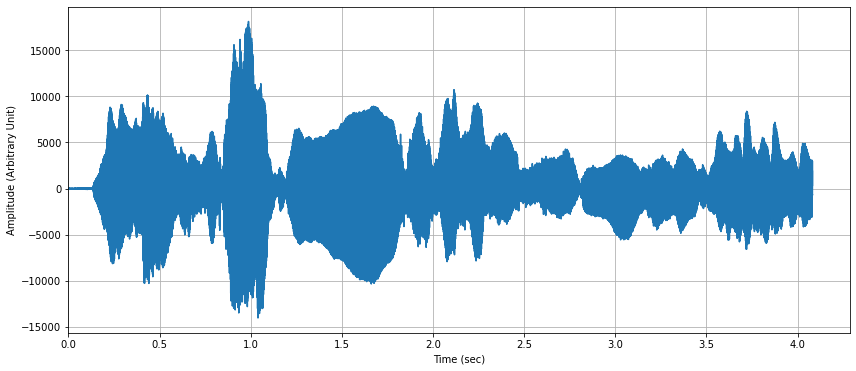

In [4]:
violin = violin.astype(np.float64)
t = np.arange(0, len(violin)) * (1/fs)

plt.figure(figsize=(14,6))
plt.plot(t, violin)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

In [5]:
Audio(violin, rate=fs)

# 2.0 Impulse Response
Data from:
<br>
https://www.iks.rwth-aachen.de/en/research/tools-downloads/databases/aachen-impulse-response-database/

## 2.1 Bathroom

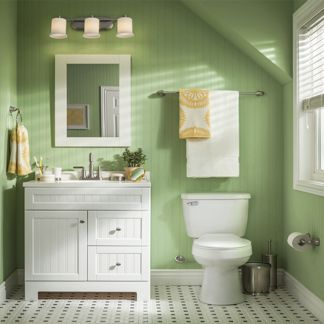

In [6]:
Image(filename='data_bhb/bathroom.jpeg', width=400)

# Image source: https://lda.lowes.com/is/image/Lowes/content-panel-desktop?src=Lowes/DP18-38994_Bathroom_dt_cp_BathroomPaint

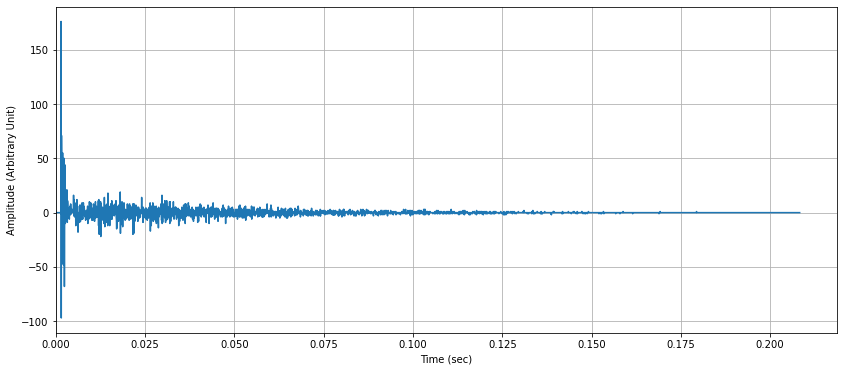

In [7]:
fs, IR_bathroom = wavfile.read("data_bhb/IR_bathroom_fs=16kHz.wav")
IR_bathroom = IR_bathroom.astype(np.float64)

t = np.arange(0, len(IR_bathroom)) * (1/fs)

plt.figure(figsize=(14,6))
plt.plot(t, IR_bathroom)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

In [8]:
Audio(IR_bathroom, rate=fs)

## 2.2 Aula Carolina Hall

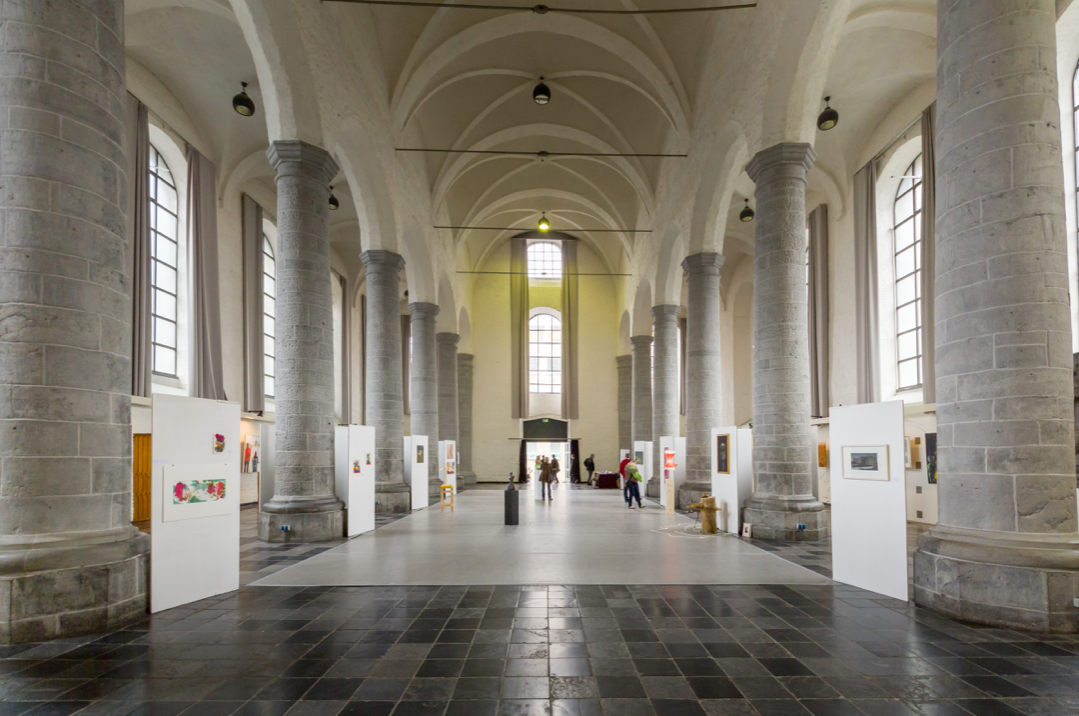

In [9]:
# The Aula Carolina hall in Aachen, Germany
Image(filename='data_bhb/Aula_Carolina.png', width=800) 

# Image source: https://de.wikipedia.org/wiki/Aula_Carolina#/media/File:Aula_Carolina.jpg

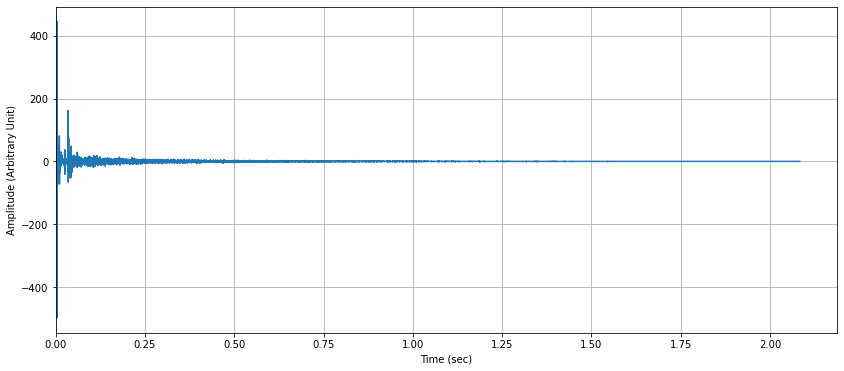

In [10]:
fs, IR_AC = wavfile.read("data_bhb/IR_ac_fs=16kHz.wav")
IR_AC = IR_AC.astype(np.float64)

t = np.arange(0, len(IR_AC)) * (1/fs)

plt.figure(figsize=(14,6))
plt.plot(t, IR_AC)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

In [11]:
Audio(IR_AC, rate=fs)

# 3.0 Convolution
We convolve the sound signals with the impulse responses to simulate what the sounds sound like in the location where the impulse response was recorded

# 3.1 Violin

In [12]:
violin_bathroom = scipy.signal.fftconvolve(violin, IR_bathroom)

In [13]:
violin_AC = scipy.signal.fftconvolve(violin, IR_AC)

In [14]:
Audio(violin, rate=fs)

In [15]:
Audio(violin_bathroom, rate=fs)

In [16]:
Audio(violin_AC, rate=fs)

# 3.2 Speech

In [17]:
fs, data = wavfile.read("data_bhb/airvib16.wav")
speech = data.astype(np.float64)

speech_bathroom = scipy.signal.fftconvolve(speech, IR_bathroom)
speech_AC = scipy.signal.fftconvolve(speech, IR_AC)

In [18]:
Audio(speech, rate=fs)

In [19]:
Audio(speech_bathroom, rate=fs)

In [20]:
Audio(speech_AC, rate=fs)

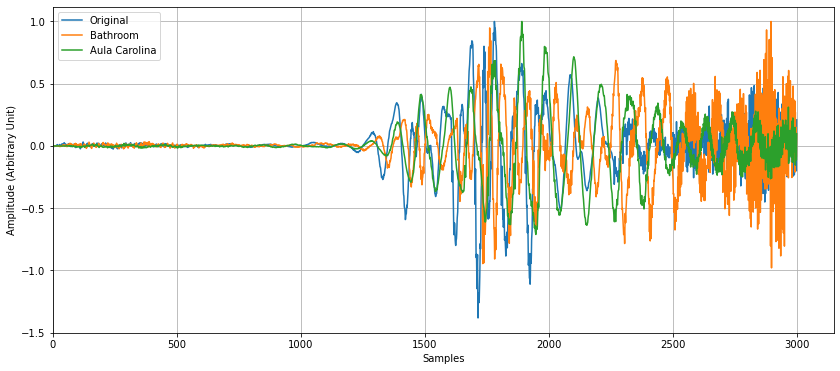

In [21]:
N = 3000
plt.figure(figsize=(14,6))
plt.plot(speech[0:N] / np.max(speech[0:N]), label='Original')
plt.plot(speech_bathroom[0:N] / np.max(speech_bathroom[0:N]), label='Bathroom')
plt.plot(speech_AC[0:N] / np.max(speech_AC[0:N]), label='Aula Carolina')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

# 4.0 Black holes! (merging)

In [22]:
fs, data = wavfile.read("data_bhb/o1o2_modelstrain30hz_stereo_hleft_lright.wav")

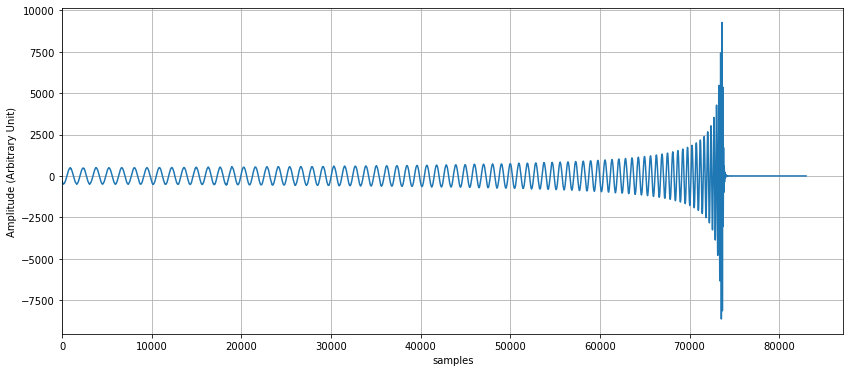

In [23]:
BH = data[307026:390026].astype(np.float64)

plt.figure(figsize=(14,6))
plt.plot(BH)
plt.xlabel('samples')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

In [24]:
BH_bathroom = scipy.signal.fftconvolve(BH, IR_bathroom)

In [25]:
BH_AC = scipy.signal.fftconvolve(BH, IR_AC)

In [26]:
Audio(BH, rate=fs)

In [27]:
Audio(BH_bathroom, rate=fs)

In [28]:
Audio(BH_AC, rate=fs)